In [337]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error as mse


%matplotlib inline

1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [503]:
X, y, coef = make_regression(n_samples=10000,
                             n_features = 2,
                             n_informative = 2,
                             n_targets = 1, 
                             noise = 10,
                             coef = True,
                             random_state = 42)

In [504]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scalered = scaler.fit_transform(X)

In [581]:
def gradient_linear(X, y, alpha, max_iter, min_weight_dist):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]    
    distance = 1
    iter_num = 0    
    y_pred = X.dot(W)
    err0 = mse(y, y_pred)
    err_list = [err0]
    
    while distance > min_weight_dist and iter_num < max_iter:
        iter_num+=1
        l1 = np.sign(W)
        l2 = W
        W -= alpha * 1/n * X.T.dot(y_pred - y)
        y_pred = X.dot(W)
        err1 = mse(y, y_pred)
        distance = err0 - err1
        err0 = err1
        err_list.append(err0)

    return err_list
    #print(f'Минимальная ошибка: {err_list[-1]}')
    #print(f'Количество итераций: {iter_num}')  

In [582]:
def SGDlinear(X, y, alpha, qty_in_batch, max_iter, min_weight_dist):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]    
    distance = 1
    iter_num = 0    
    err_list = []
    
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    
    n_batch_list = [i for i in range(n_batch)]
    
    while distance > min_weight_dist and iter_num < max_iter:
        for b in n_batch_list:
            iter_num += 1
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            
            X_tmp = X[start_ : end_,:]
            y_tmp = y[start_ : end_]
            y_pred_temp = X_tmp.dot(W)
            
            err0 = mse(y_tmp, y_pred_temp)
            err_list.append(err0)
        
            W -= alpha * 1/n * X_tmp.T.dot(y_pred_temp - y_tmp)
            
            y_pred_temp = X_tmp.dot(W)
            err1 = mse(y_tmp, y_pred_temp)
            distance = err0 - err1
            
    return err_list
    #print(f'Минимальная ошибка: {err_list[-1]}')
    #print(f'Количество итераций: {iter_num}')   

In [657]:
def plot(err1,err2):
    plt.plot(range(len(err1)), err1)
    plt.plot(range(len(err2)), err2)
    plt.title('MSE')
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')

In [610]:
err1 = gradient_linear(X_scalered, y, alpha=1e-2, max_iter=1e3, min_weight_dist=1e-3)
err2 = SGDlinear(X_scalered, y, alpha=1e-2, qty_in_batch = 50, max_iter=1e8, min_weight_dist=1e-3)

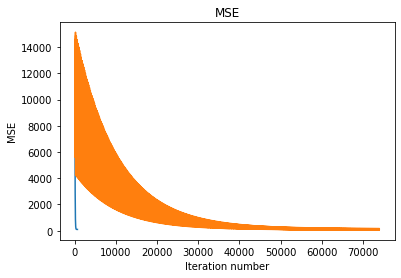

In [658]:
plot(err1,err2)

2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации и сравнить результаты.

In [584]:
def gradient_l2(X, y, alpha, max_iter, min_weight_dist, eta):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]    
    distance = 1
    iter_num = 0    
    y_pred = X.dot(W)
    err0 = mse(y, y_pred)
    err_list = [err0]
    
    while distance > min_weight_dist and iter_num < max_iter:
        iter_num+=1
        W -= alpha * (1/n * X.T.dot(y_pred - y) + eta * W)
        y_pred = X.dot(W)
        err1 = mse(y, y_pred)
        distance = err0 - err1
        err0 = err1
        err_list.append(err0)
        
    return err_list
    #print(f'Минимальная ошибка: {err_list[-1]}')
    #print(f'Количество итераций: {iter_num}') 

In [585]:
def SGDlinear_l2(X, y, alpha, qty_in_batch, max_iter, min_weight_dist, eta):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]    
    distance = 1
    iter_num = 0    
    err_list = []
    
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    
    n_batch_list = [i for i in range(n_batch)]
    
    while distance > min_weight_dist and iter_num < max_iter:
        for b in n_batch_list:
            iter_num += 1
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            
            X_tmp = X[start_ : end_,:]
            y_tmp = y[start_ : end_]
            y_pred_temp = X_tmp.dot(W)
            
            err0 = mse(y_tmp, y_pred_temp)
            err_list.append(err0)
        
            W -= alpha * (1/n * X_tmp.T.dot(y_pred_temp - y_tmp) + eta * W)
            
            y_pred_temp = X_tmp.dot(W)
            err1 = mse(y_tmp, y_pred_temp)
            distance = err0 - err1
            
    return err_list
    #print(f'Минимальная ошибка: {err_list[-1]}')
    #print(f'Количество итераций: {iter_num}')   

In [594]:
err1_l2 = gradient_l2(X_scalered, y, alpha=1e-2, max_iter=1e3, min_weight_dist=1e-3, eta = 1e-4)
err2_l2 = SGDlinear_l2(X_scalered, y, alpha=1e-2, qty_in_batch = 50, max_iter=1e8, min_weight_dist=1e-3, eta = 1e-4)

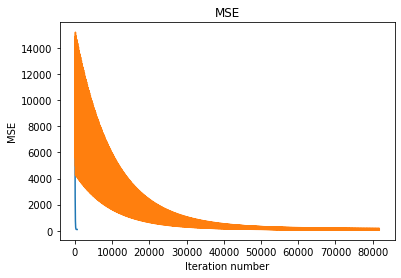

In [659]:
plot(err1_l2,err2_l2)

3. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [640]:
def gradient_l1(X, y, alpha, max_iter, min_weight_dist, eta):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]    
    distance = 1
    iter_num = 0    
    y_pred = X.dot(W)
    err0 = mse(y, y_pred)
    err_list = [err0]
    
    while distance > min_weight_dist and iter_num < max_iter:
        iter_num += 1
        W -= alpha * (1/n * X.T.dot(y_pred - y) + eta * np.sign(W))
        y_pred = X.dot(W)
        err1 = mse(y, y_pred)
        distance = err0 - err1
        err0 = err1
        err_list.append(err0)
        
    return err_list
    #print(f'Минимальная ошибка: {err_list[-1]}')
    #print(f'Количество итераций: {iter_num}') 

In [639]:
def SGDlinear_l1(X, y, alpha, qty_in_batch, max_iter, min_weight_dist, eta):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]    
    distance = 1
    iter_num = 0    
    err_list = []
    
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    
    n_batch_list = [i for i in range(n_batch)]
    
    while distance > min_weight_dist and iter_num < max_iter:
        for b in n_batch_list:
            iter_num += 1
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            
            X_tmp = X[start_ : end_,:]
            y_tmp = y[start_ : end_]
            y_pred_temp = X_tmp.dot(W)
            
            err0 = mse(y_tmp, y_pred_temp)
            err_list.append(err0)
        
            W -= alpha * (1/n * X_tmp.T.dot(y_pred_temp - y_tmp) + eta * np.sign(W))
            
            y_pred_temp = X_tmp.dot(W)
            err1 = mse(y_tmp, y_pred_temp)
            distance = err0 - err1
            
    return err_list
    #print(f'Минимальная ошибка: {err_list[-1]}')
    #print(f'Количество итераций: {iter_num}')   

In [642]:
err1_l1 = gradient_l1(X_scalered, y, alpha=1e-2, max_iter=1e3, min_weight_dist=1e-3, eta = 1e-4)
err2_l1 = SGDlinear_l1(X_scalered, y, alpha=1e-2, qty_in_batch = 50, max_iter=1e8, min_weight_dist=1e-3, eta = 1e-4)

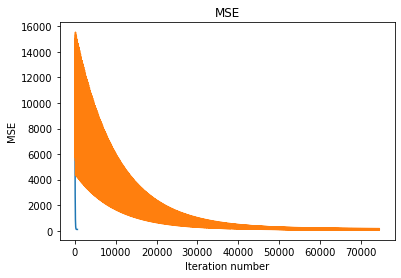

In [660]:
plot(err1_l1,err2_l1)

Сравнение результатов:

In [649]:
def results(err1,err2, reg = ''):
    print(f'Gradient {reg} min error: {err1[-1].round(2)}')
    print(f'Gradient {reg} iterrations: {len(err1)}')
    print(f'SGD {reg} min error: {err2[-1].round(2)}')
    print(f'SGD {reg} iterrations: {len(err2)}')

In [655]:
results(err1,err2)

Gradient  min error: 98.77
Gradient  iterrations: 609
SGD  min error: 89.94
SGD  iterrations: 74000


In [654]:
results(err1_l2, err2_l2,reg ='L2')

Gradient L2 min error: 98.77
Gradient L2 iterrations: 610
SGD L2 min error: 96.8
SGD L2 iterrations: 81800


In [656]:
results(err1_l1,err2_l1,reg ='L1') 

Gradient L1 min error: 98.77
Gradient L1 iterrations: 608
SGD L1 min error: 89.96
SGD L1 iterrations: 74600
